# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd

# Import functions
import portfolio_var as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 9,
    "NVDA": 80,
    "GOOGL": 6,
    "JPM": -9
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2024-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] MSFT: USD
[currency detection] NVDA: USD
[fx download] Downloading FX pairs: CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 13083.53

Sample of daily returns:
                 AAPL     GOOGL       JPM      MSFT      NVDA
Date                                                        
2024-01-03  0.002215  0.015257  0.005375  0.009041 -0.002782
2024-01-04 -0.014117 -0.019621  0.005191 -0.008602  0.007570
2024-01-05 -0.002723 -0.003550  0.006319  0.000779  0.024222
2024-01-08  0.025054  0.023792 -0.000594  0.019747  0.065195
2024-01-09 -0.005582  0.011820 -0.011206 -0.000401  0.013592

Mean returns (daily, in CHF):
 AAPL     0.000575
GOOGL    0.000743
JPM      0.001519
MSFT     0

In [3]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [4]:
position_data.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-02,1551.522630,694.622688,-1259.144120,2778.545401,3242.954747
2024-01-03,1554.959016,705.220497,-1265.911624,2803.665191,3233.934430
2024-01-04,1533.007866,691.383402,-1272.483602,2779.547297,3258.416930
2024-01-05,1528.834091,688.929295,-1280.525050,2781.711572,3337.342530
2024-01-08,1567.138256,705.320088,-1279.764925,2836.640769,3554.920289


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data=position_data,
                                 confidence_level=confidence_level,
                                 holding_period=holding_period)

In [6]:
summary_df.head(-10)

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2024-01-03,387.107008,432.915852,45.808844
2024-01-04,387.258847,432.170465,44.911618
2024-01-05,393.314283,438.320897,45.006614
2024-01-08,413.771662,461.399126,47.627464
2024-01-09,417.766904,466.027674,48.260771
...,...,...,...
2025-04-28,715.508359,764.926377,49.418018
2025-04-29,711.448312,760.560213,49.111902
2025-04-30,713.143025,762.570435,49.427410


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [8]:
marginal_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.027918,0.029324,0.011439,0.029002,0.079217
2024-01-04,0.027769,0.029202,0.011366,0.028910,0.079365
2024-01-05,0.027604,0.029078,0.011345,0.028801,0.079552
2024-01-08,0.027399,0.028924,0.011474,0.028638,0.079856
2024-01-09,0.027310,0.028897,0.011530,0.028589,0.079959


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [10]:
component_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,43.411084,20.679800,-14.480656,81.313167,256.183613
2024-01-04,42.569792,20.189449,-14.462881,80.357975,258.604513
2024-01-05,42.201733,20.032647,-14.527973,80.116088,265.491788
2024-01-08,42.938074,20.400689,-14.684502,81.235634,283.881766
2024-01-09,42.559460,20.622572,-14.590441,81.064857,288.110455


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [12]:
rcvar_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112142,0.053421,-0.037407,0.210053,0.661790
2024-01-04,0.109926,0.052134,-0.037347,0.207505,0.667782
2024-01-05,0.107298,0.050933,-0.036937,0.203695,0.675012
2024-01-08,0.103772,0.049304,-0.035489,0.196330,0.686083
2024-01-09,0.101874,0.049364,-0.034925,0.194043,0.689644


In [13]:
# # Define change in position
# change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0]  

# # Compute and display Incremental VaR
# ivar_series = pv.incremental_var(
#     position_data=position_data,
#     change_vector=change_vector,
#     confidence_level=confidence_level,
#     holding_period=holding_period,
# )

In [14]:
# ivar_series.head()

## ES Test

In [15]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [16]:
marginal_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.031984,0.033595,0.013105,0.033227,0.090756
2024-01-04,0.031814,0.033455,0.013021,0.033122,0.090926
2024-01-05,0.031625,0.033314,0.012998,0.032996,0.091140
2024-01-08,0.031390,0.033137,0.013146,0.032810,0.091488
2024-01-09,0.031288,0.033106,0.013210,0.032754,0.091606


In [17]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [18]:
component_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,49.734538,23.692113,-16.589974,93.157611,293.500476
2024-01-04,48.770700,23.130336,-16.569610,92.063280,296.274015
2024-01-05,48.349028,22.950693,-16.644183,91.786159,304.164522
2024-01-08,49.192628,23.372345,-16.823513,93.068784,325.233267
2024-01-09,48.758864,23.626549,-16.715750,92.873130,330.077926


In [19]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [20]:
res_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112142,0.053421,-0.037407,0.210053,0.661790
2024-01-04,0.109926,0.052134,-0.037347,0.207505,0.667782
2024-01-05,0.107298,0.050933,-0.036937,0.203695,0.675012
2024-01-08,0.103772,0.049304,-0.035489,0.196330,0.686083
2024-01-09,0.101874,0.049364,-0.034925,0.194043,0.689644


In [21]:
# # Define change in position
# change_vector = [0,10000,0,0,0,0,0,0,0,0,0,0] 

# # Compute and display Incremental VaR
# ies_series = pv.incremental_es(
#     position_data=position_data,
#     change_vector=change_vector,
#     confidence_level=confidence_level,
#     holding_period=holding_period,
# )

In [22]:
# ies_series.head()

### Visualizations


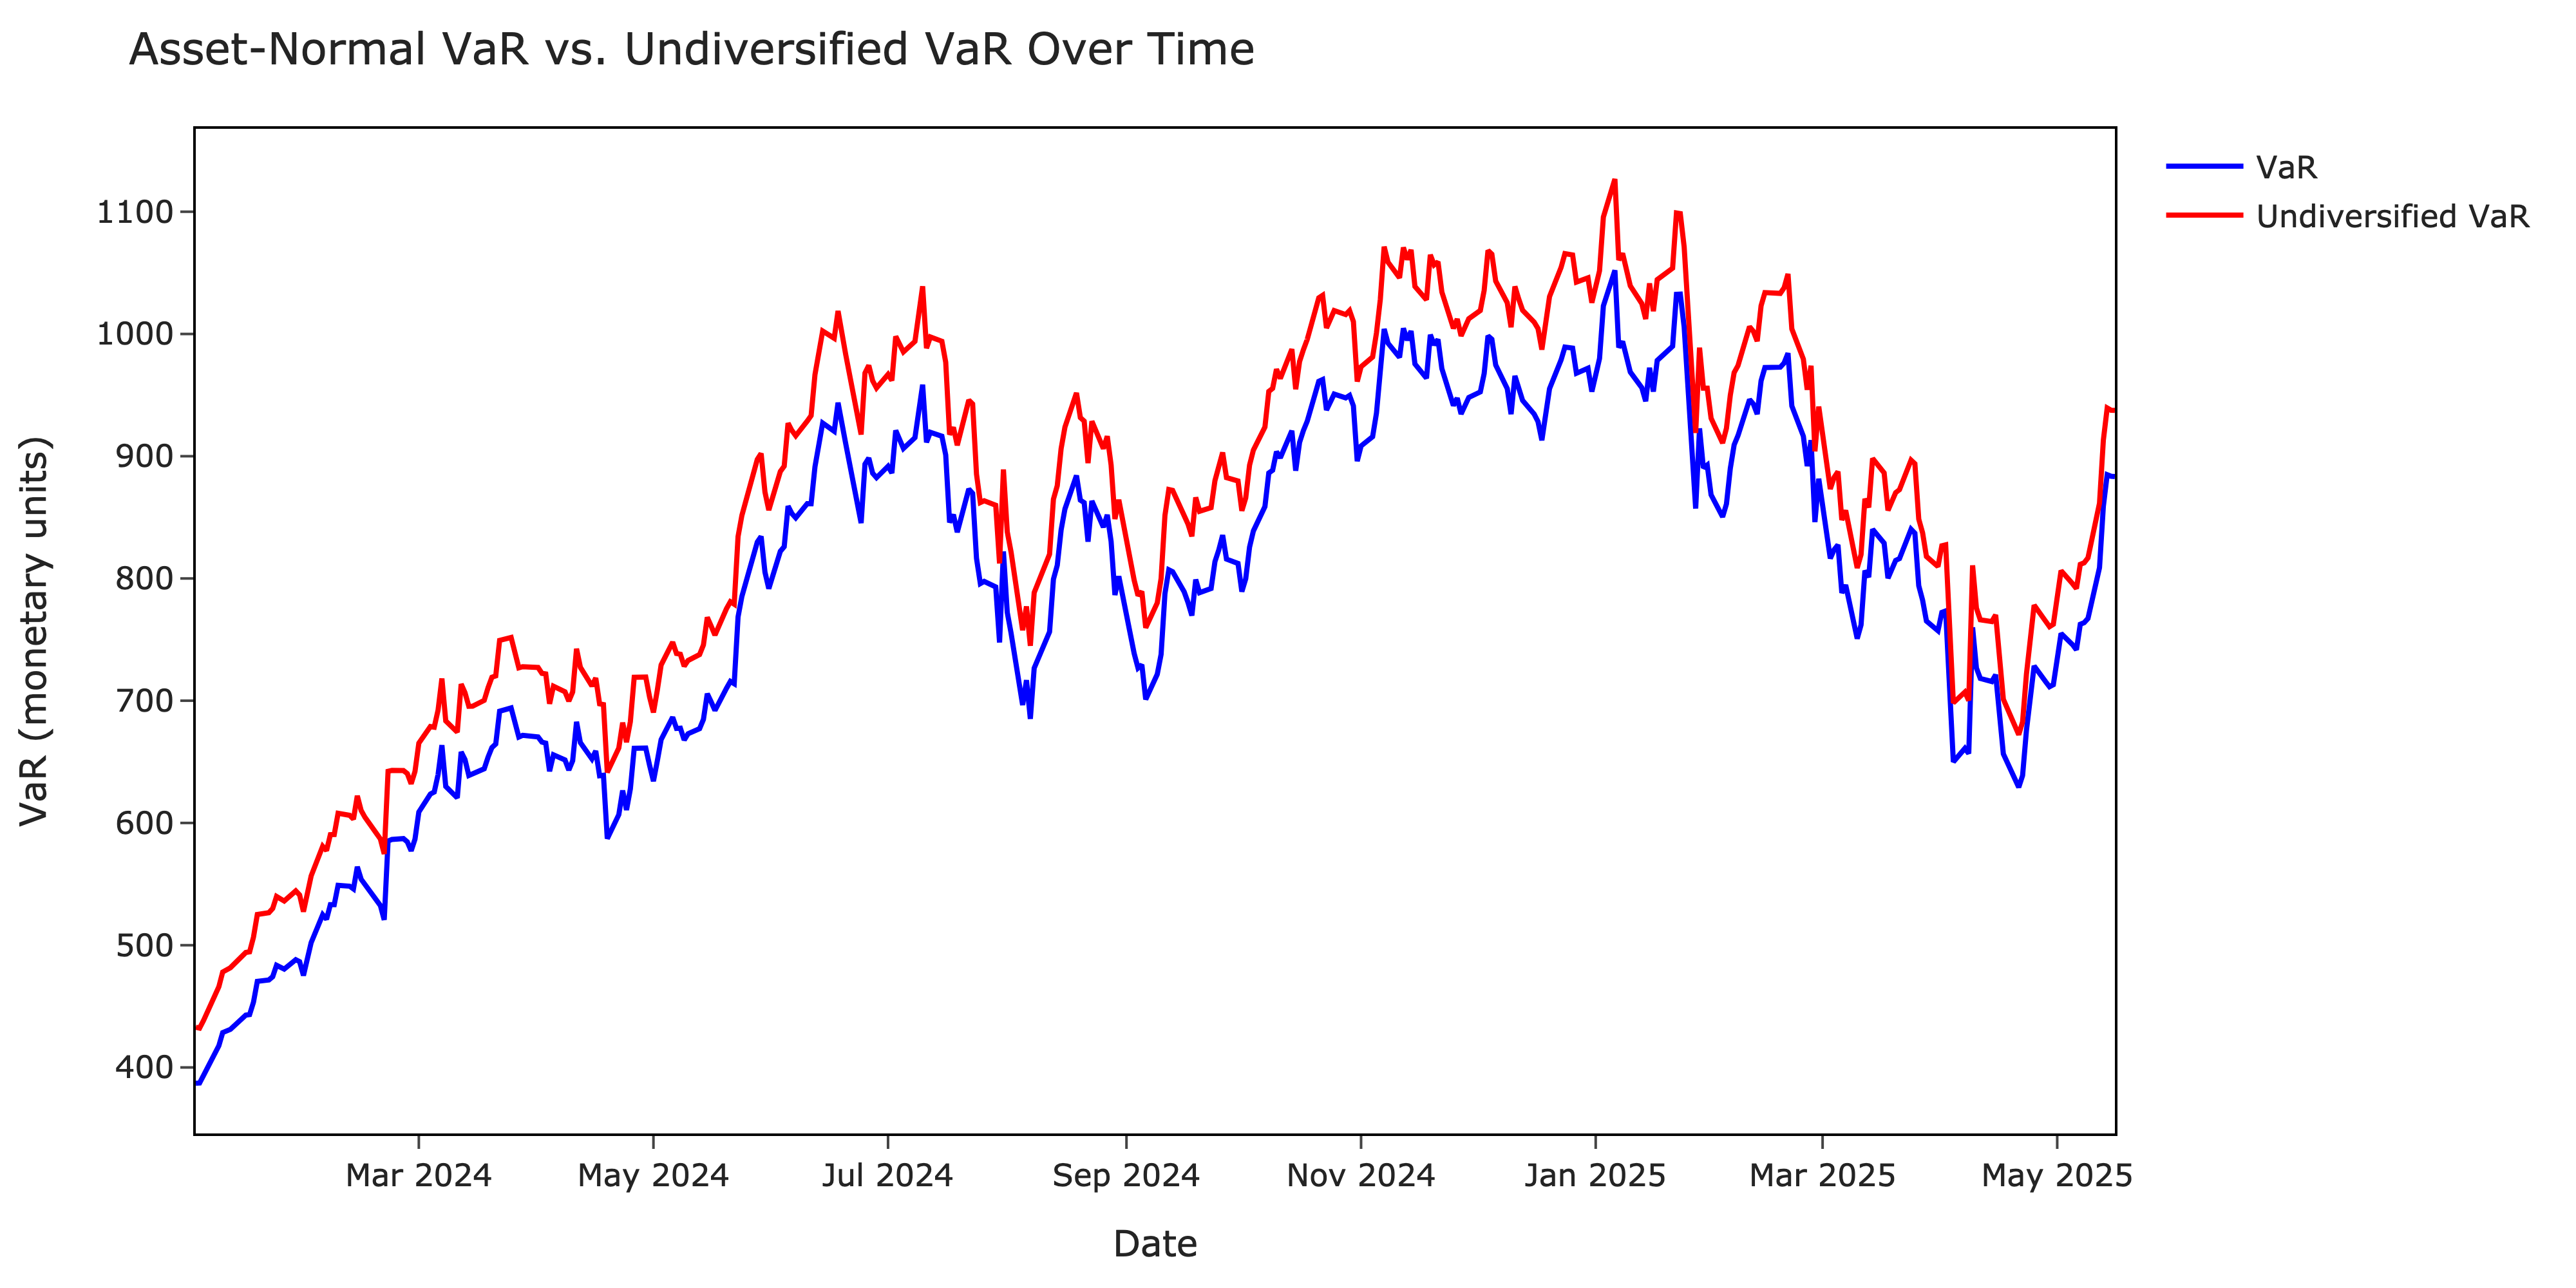

In [23]:
pl.plot_var_series(summary_df, interactive=False)


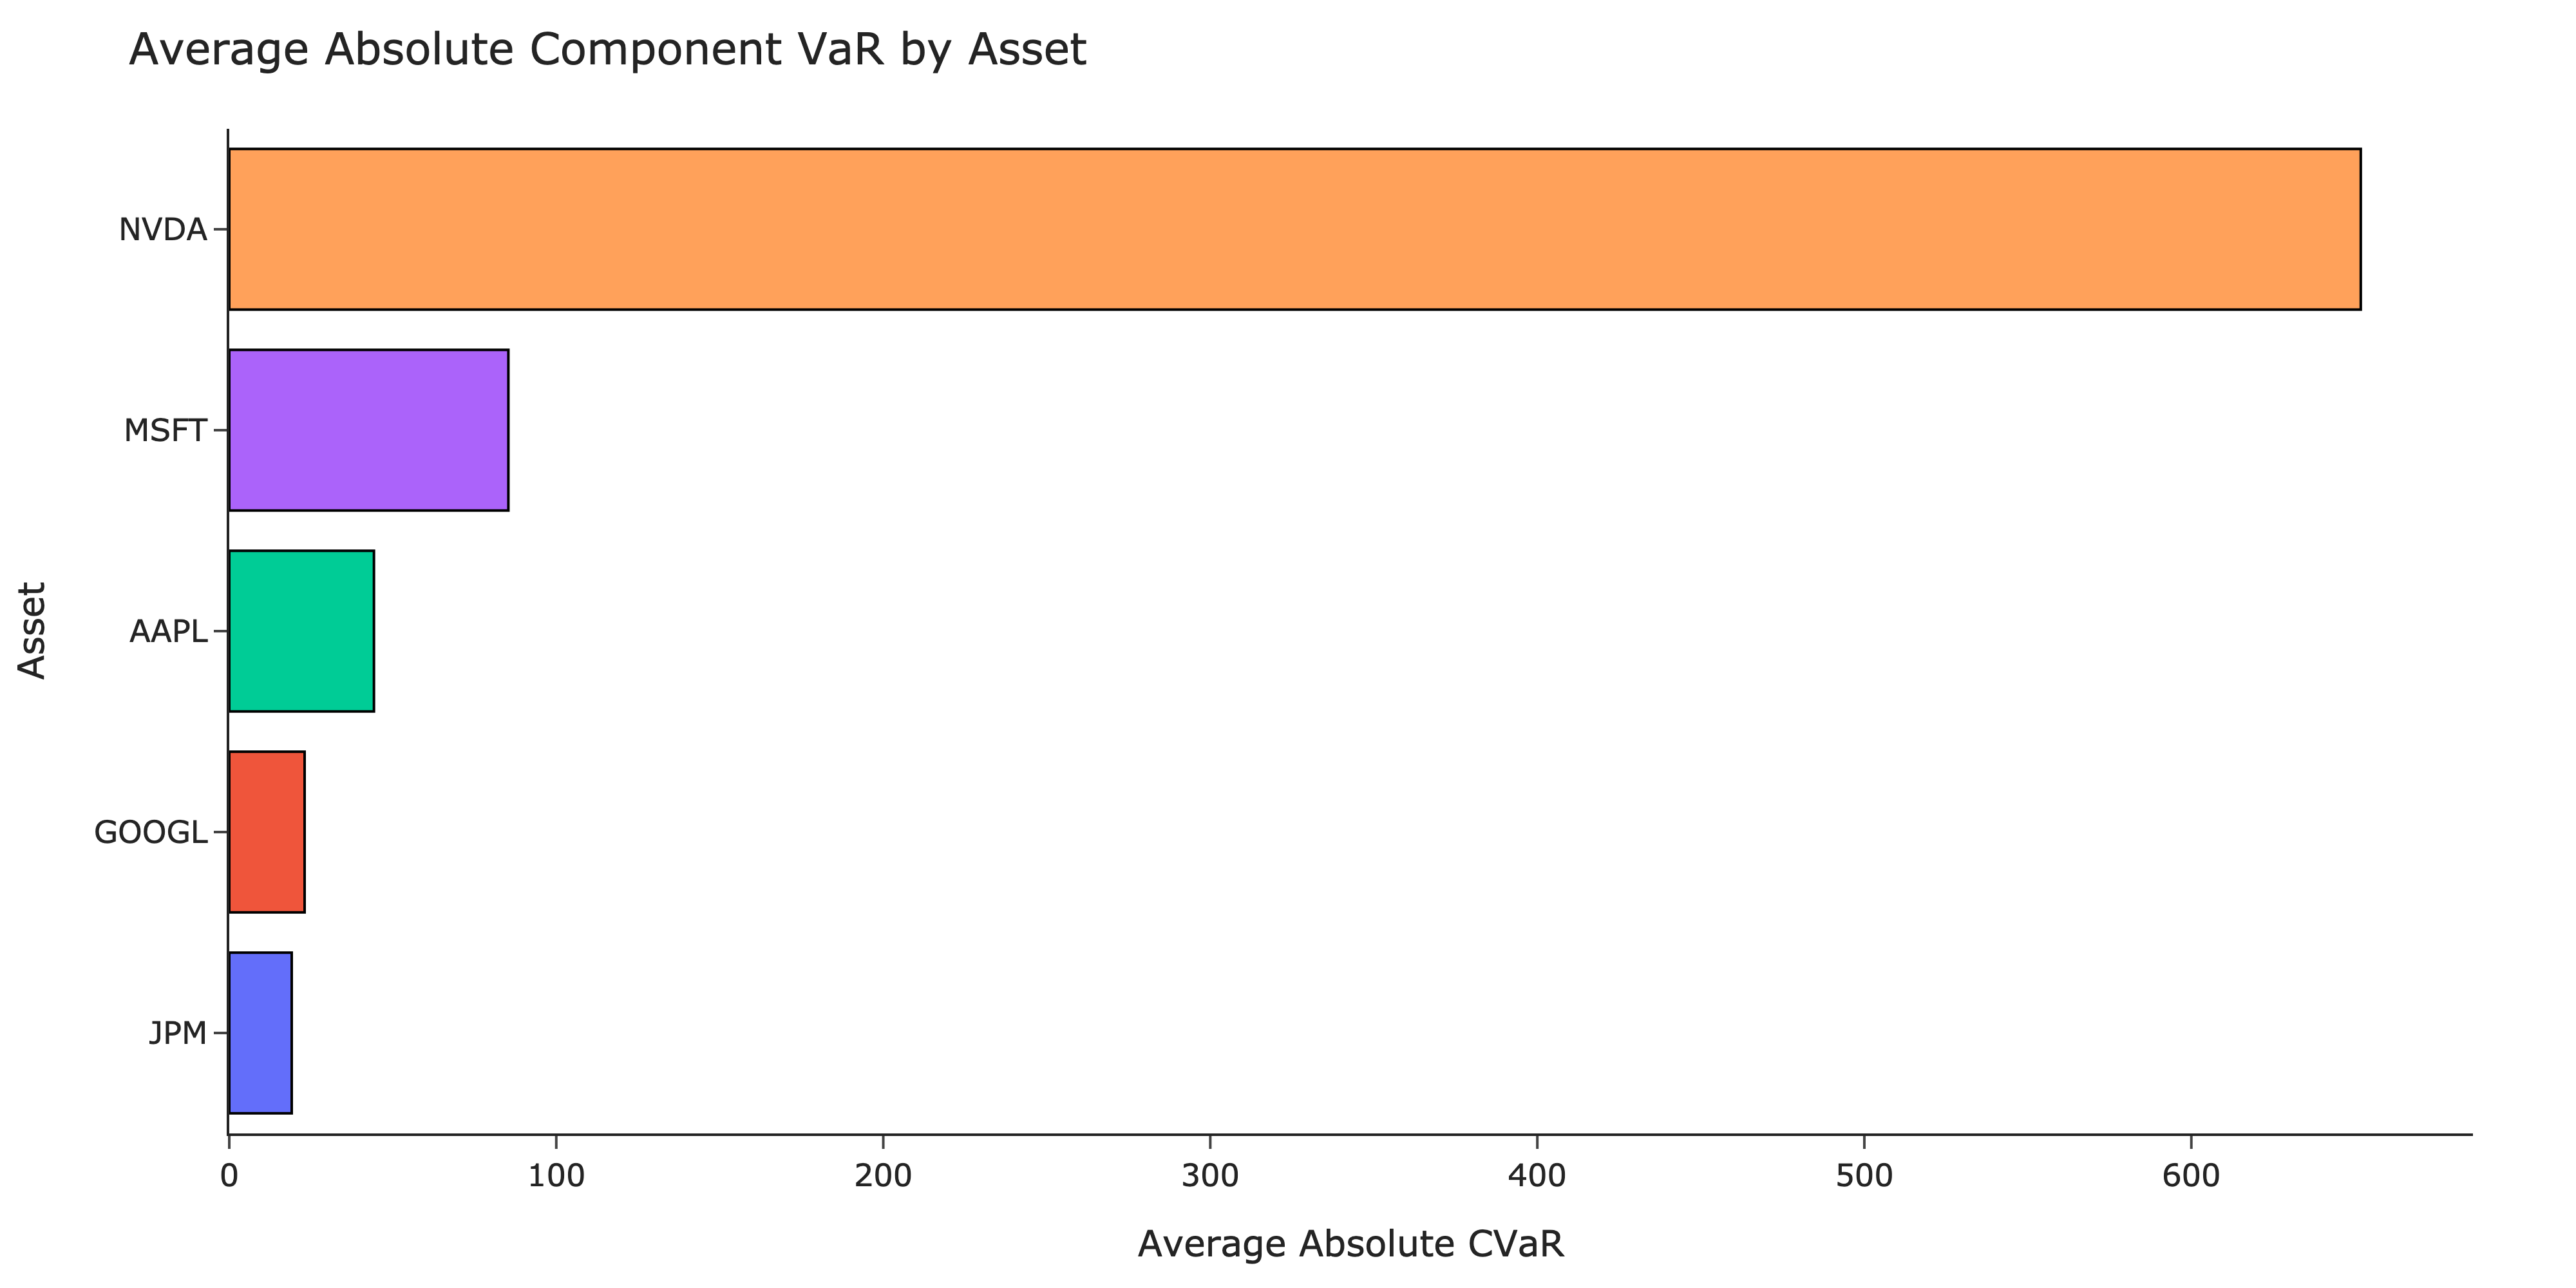

In [24]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


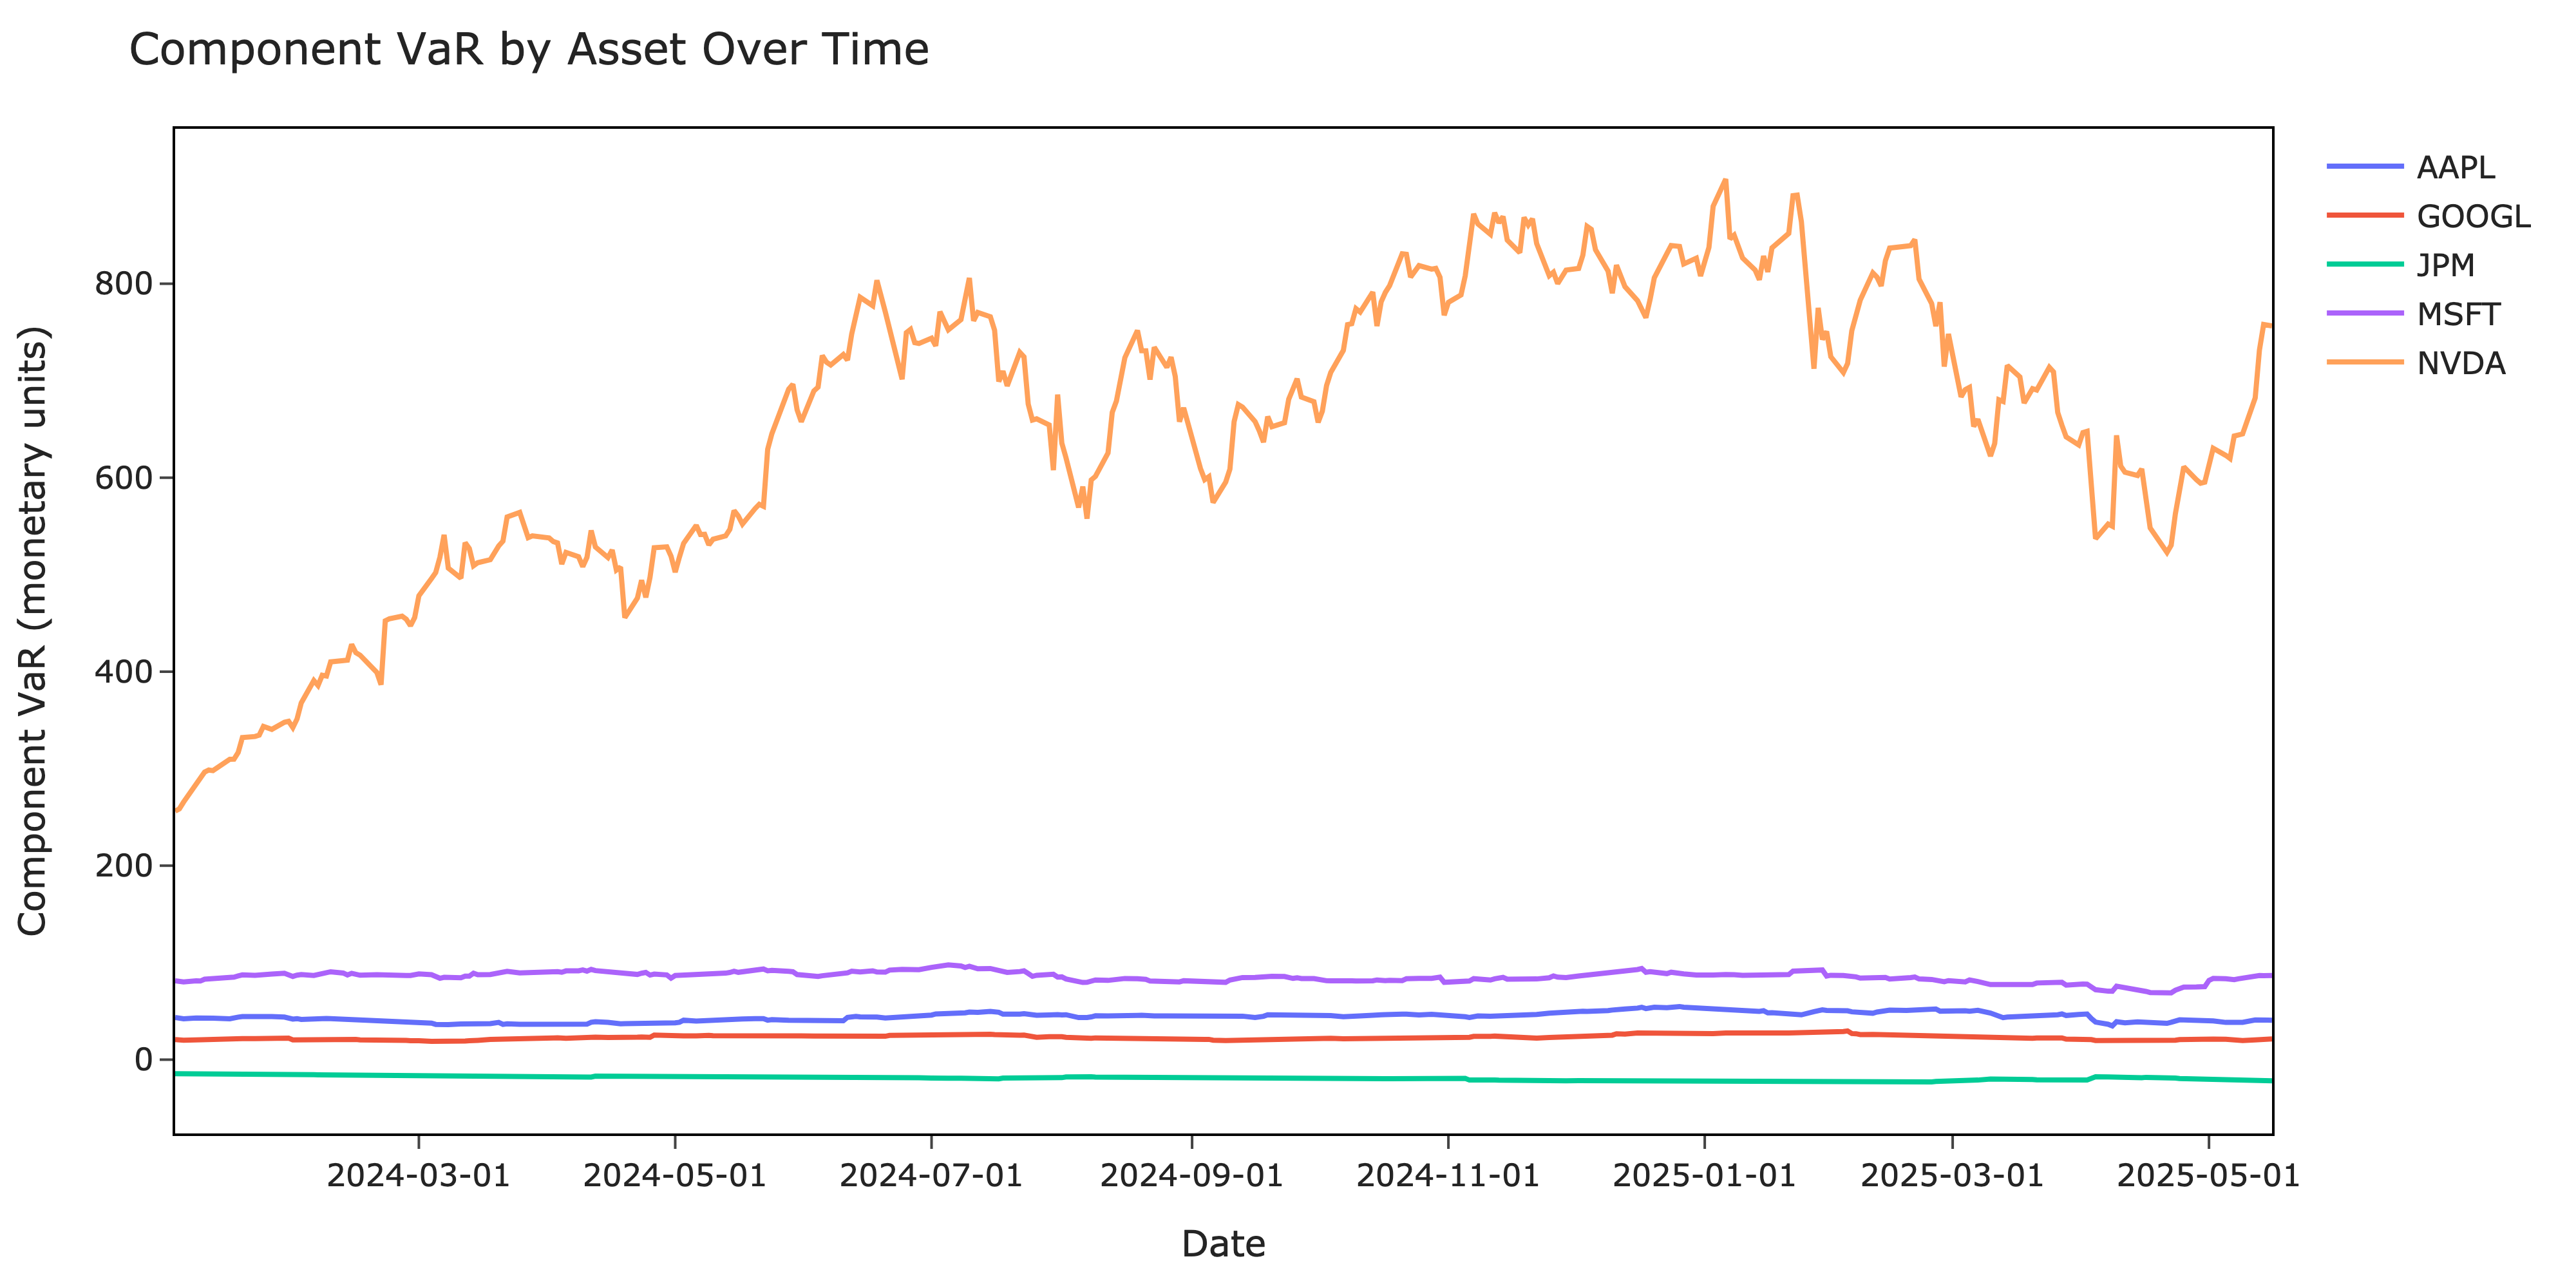

In [25]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


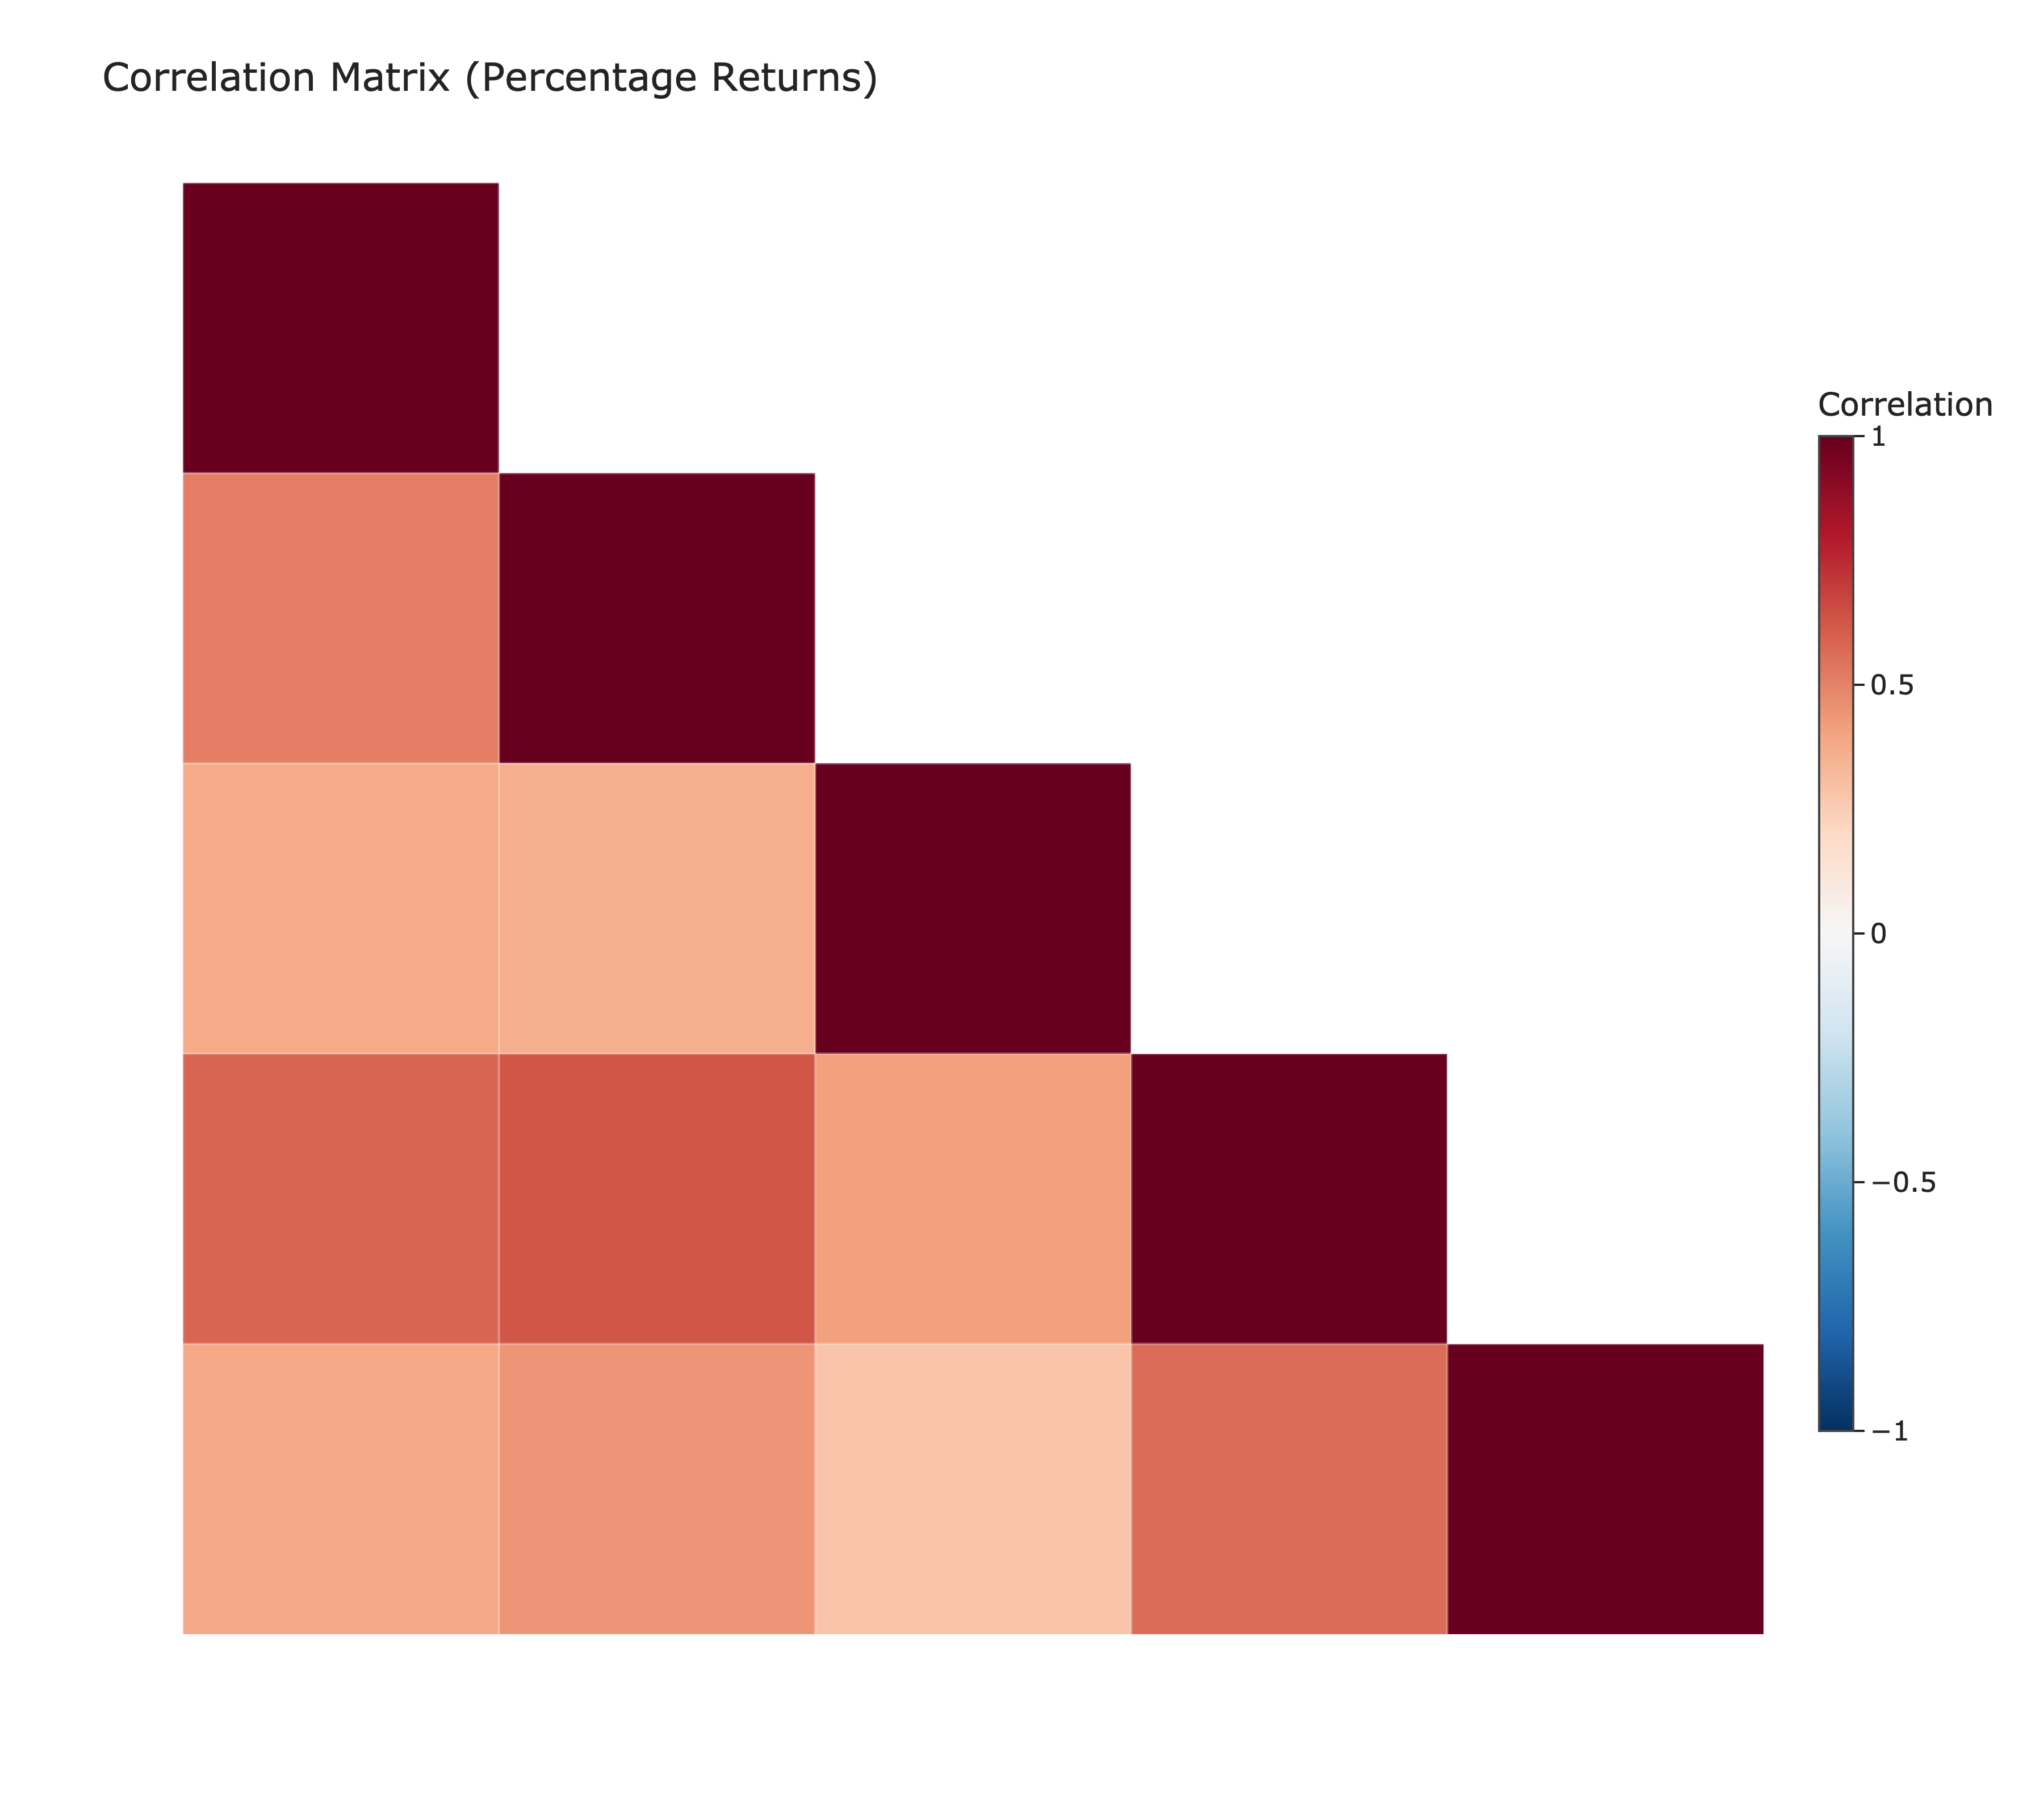

In [26]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.